<em><p style="font-size:24px">Classification on the "Adult" Dataset (Income > 50.000 Dollars per Year)</p></em>

<u><p style="font-size:20px">1. Formulating the Goal of the Analysis</p></u>

This example is based on data from the "Adult" dataset. The aim of the analysis is to predict whether or not (and due to which factors) an individual earns more than 50.000 dollars a year. A variety of classifiers will be tested and their accuracy will be evaluated on a test dataset. The best performing classifier will be used to predict whether or not the yearly income of 3 fictional individuals, with a pre-determined set of demographic characteristics, is likely to be higher than 50.000 dollars.

The data is openly available on the homepage of the University of California: http://archive.ics.uci.edu/ml/datasets/Adult

<u><p style="font-size:20px">2. Importing the Relevant Libraries</p></u>

We will import the relevant libraries on the go as we reach the places where we need them. In this way, we can get a better understanding of which libraries are needed for which particular tasks.

<u><p style="font-size:20px">3. Importing and Transforming the Data</p></u>

We will now import (or read) the data, which is provided as a comma delimited ".data" file. We will need the Pandas library to read the file. Moreover, the raw data file has not been provided with column headers by default, which is why we will define them manually by referring to the "adult.names" info file, which can be downloaded together with the dataset on the UCI's linked earlier.

The "adult.names" file identifies the columns as follows:

In [1]:
import pandas as pd

raw_data = pd.read_csv("Adult_Example_Data.data", names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
                              "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
                              "hours-per-week","native-country", "income"])

raw_data.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Since the import of the .data file resulted in a format of values that cannot be correctly interpreted by numpy (we will work with numpy in a bit), we need to transform the dataset into a numpy friendly format, while also storing it in a Pandas Dataframe:

In [2]:
raw_data_transformed = pd.DataFrame(raw_data.to_numpy())

raw_data_transformed.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Unfortunately, this process has removed the column names again, so we have to add them once more:

In [3]:
raw_data_transformed.columns=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
                              "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
                              "hours-per-week","native-country", "income"]

raw_data_transformed.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


<u><p style="font-size:20px">4. Exploring the Data</p></u>

We can now take a more detailled look at the dataset by using Panda's neat profile report feature. It is necessary to import "pandas_profiling" for this feature.

In [4]:
import pandas_profiling

raw_data_transformed.profile_report()

<u><p style="font-size:18px">4.1. Variable Clarification</p></u>

The dataset provides cases of individuals and a variety of demographic features to describe them. Here is a description for better clarification:

<b>age</b>: The age of the respondent. The data is numerical.

<b>workclass</b>: Describes the individuals job position. The data is categorical with the following values: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

<b>fnlwgt</b>: A weight variable, probably to weight the sample to be nationally representative. The data is numerical.

<b>education</b>: Describes the highest educational degree a person has achieved. The data is categorical with the following values: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

<b>education-num</b>: A variable that includes numerical codes for the different types of education.

<b>marital-status</b>: Describes the respondent's marital status. The data is categorical with the following values: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

<b>occupation</b>: Describes the respondent's occupation. The data is categorical with the following values: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

<b>relationship</b>: A variable that includes the relationship status of a person. The data is categorical with the following values: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

<b>race</b>: Describes the respondent's race. The data is categorical with the following values: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

<b>sex</b>: A person's gender, described as male or female. The data is dichotomous.

<b>capital-gain</b>: Indicates whether a person has realized financial gains from owned capital, and how much. The data is numeric.

<b>capital-loss</b>: Indicates whether a person has suffered a financial loss regarding owned capital, and how much. The data is numeric.

<b>hours-per-week</b>: Describes how many hours per week a respondent works on average. The data is numeric.

<b>native-country</b>: A person's home country. The data is categorical with the values: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

<b>income</b>: A dichotomous variable that indicates whether or not a person is earning more than 50.000 dollars a year. Describes how many hours per week a respondent works on average. The data is numeric.

<u><p style="font-size:20px">5. Cleaning and Preparing the Data</p></u>

In this section, we will take a closer look at the variables in the dataset with respect to their usefulness for the analysis. We will also identify errors, missing values and/or outliers and clean the dataset in order to prepare it for the analysis.

<u><p style="font-size:18px">5.1. Dropping Unusable Variables:</p></u>

We can see that the dataset has many variables to describe individuals. However, not all of them are useful for our analysis. We will be dropping a number of them from the dataset for the following reasons:

1. <b>fnlwgt</b> is a weight variable to be applied in order to make the dataset's results nationally representative. However, the variable carries no importance for our particular analysis.


2. <b>education-num</b> is a numerical re-coding of the categorical variable <b>education</b>. We will at a later point re-code <b>education</b> ourselves into a variable with fewer categories. Therefore, we do not need to keep <b>education-num</b>.


3. <b>relationship</b> does not seem to include any information that is not already explained by the <b>marital-status</b> variable. Moreover, some of its categories such as "Husband", "Wife" or "Unmarried" overlap with <b>marital-status</b>. Moreover, the variable is highly correlated with <b>sex</b> and categorizes respondents into specific sub-groups that do not appear relevant for our analysis.


4. There are a number of difficulties with <b>capital-gain</b> and <b>capital-loss</b>. First of all, these variables do not seem to add any information to our analysis that is not already expressed in the dependent variable <b>income</b> itself. Capital gains or losses will be very closely linked to a person's overall income, as they can be considered a part of the income itself. Moreover, both variables have zero values for more than 90% of the sample. We can see the percentages below:

In [5]:
gain_zero = round(raw_data_transformed["capital-gain"].value_counts(1)[0:1]*100,2)
loss_zero = round(raw_data_transformed["capital-loss"].value_counts(1)[0:1]*100,2)
capital_zero = pd.DataFrame([gain_zero,loss_zero])
capital_zero.rename(columns={0: "% Zero Values of Sample"}, inplace=True)
capital_zero

,% Zero Values of Sample
capital-gain,91.67
capital-loss,95.33


As a result, we will be dropping <b>fnlwgt</b>, <b>education-num</b>, <b>relationship</b>, <b>capital-gain</b> and <b>capital-loss</b> from our dataset and save a new copy without them:

In [6]:
data_v001 = raw_data_transformed.drop([
    "fnlwgt", 
    "education-num", 
    "relationship", 
    "capital-gain", 
    "capital-loss"], axis=1)

data_v001.head(5)

,age,workclass,education,marital-status,occupation,race,sex,hours-per-week,native-country,income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,White,Male,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Black,Female,40,Cuba,<=50K


<u><p style="font-size:18px">5.2. Transforming Cloumns into the Correct Data Type</p></u>

At this point, the import of the .data file into Jupyter has caused the values in every column of the dataset to be interpreted as objects:

In [7]:
data_v001.dtypes

age               object
workclass         object
education         object
marital-status    object
occupation        object
race              object
sex               object
hours-per-week    object
native-country    object
income            object
dtype: object

The "object" type is not practical for the future operations we plan to perform on our dataset, i.e. categorizations, dummy transformations and the creation of our model. 

To change this, we can use Panda's <em>astype</em> functionality to transform the columns into the format we would expect, and that we need in order to work with them in the following steps. We will choose the <u>integer</u> format for both <b>age</b> and <b>hours-per-week</b> as these variables are numeric, and the <u>category</u> format for all other columns, which are categorical.

In [8]:
data_v001 = data_v001.astype({
"age": "int",
"workclass": "category",
"education": "category",
"marital-status": "category",
"occupation": "category",
"race": "category",
"sex": "category",
"hours-per-week": "int",   
"native-country": "category",
"income": "category"})

Let's check if the transformation has worked correctly:

In [9]:
data_v001.dtypes

age                  int32
workclass         category
education         category
marital-status    category
occupation        category
race              category
sex               category
hours-per-week       int32
native-country    category
income            category
dtype: object

The transformation has indeed worked correctly and we can proceed to the next step.

<u><p style="font-size:18px">5.3. Identifying and Dealing with Missing Values, Outliers and Errors</p></u>

After we have have transformed our data, we can now identify possible missing values, outliers and/or errors in our dataset. We can start by having a look at the summary table for our new data_v001.

In [10]:
data_v001.describe(include="all")

,age,workclass,education,marital-status,occupation,race,sex,hours-per-week,native-country,income
count,32561.000000,32561,32561,32561,32561,32561,32561,32561.000000,32561,32561
unique,NaN,9,16,7,15,5,2,NaN,42,2
top,NaN,Private,HS-grad,Married-civ-spouse,Prof-specialty,White,Male,NaN,United-States,<=50K
freq,NaN,22696,10501,14976,4140,27816,21790,NaN,29170,24720
mean,38.581647,NaN,NaN,NaN,NaN,NaN,NaN,40.437456,NaN,NaN
std,13.640433,NaN,NaN,NaN,NaN,NaN,NaN,12.347429,NaN,NaN
min,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,28.000000,NaN,NaN,NaN,NaN,NaN,NaN,40.000000,NaN,NaN
50%,37.000000,NaN,NaN,NaN,NaN,NaN,NaN,40.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,NaN


We should note that, even though the counts do not indicate missing values (all variables have 32560 valid cases), there are other ways in which missing data could be indicated, for example by values such as "9999". This is why we should have a closer look at each of them.

<u><p style="font-size:16px">5.3.1. Identifying Missing Values in <b>age</b></p></u>

According to the summary, there should be no missing values in the <b>age</b> variable as we have a full base of 32560 respondents, just like in any other column of the dataset.

However, to be 100% certain, we should check the unique values in <b>age</b> and see if they make sense. We can also check for missing values with the <u>isnull</u> operator:

We will need the numpy library for these and many other operations that follow from here, so we will import it.

In [11]:
import numpy as np

np.sort(data_v001["age"].unique())

array([17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 90])

In [12]:
data_v001["age"].isnull().unique()

array([False])

We can see that the <b>age</b> variable includes values from 17 to 90 years, all cases have data, and there are no values present that do not make sense or could indicate missing values. As a result, there is no need for us to act with regard to <b>age</b>.

<u><p style="font-size:16px">5.3.2. Identifying Missing Values in <b>workclass</b></p></u>

What about <b>workclass</b>? The summary did not indicate missing values, but there is the possibility that missing values were indicated differently.

In [13]:
np.sort(data_v001["workclass"].unique())

array([' ?', ' Federal-gov', ' Local-gov', ' Never-worked', ' Private',
       ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay'],
      dtype=object)

We can observe two things from this result. Firstly, we have a category "<b>?</b>" in the workclass column, a clear indicator for missing values. Secondly, every category seems to have an empty space " " preceding it.

The empty space is probably a result of the previous transformations that we applied to our data and thus we might also see this phenomenon appear in the other columns of our dataset. We can test this by checking the unique values of another column with categorical data, such as <b>education</b>:

In [14]:
np.sort(data_v001["education"].unique())

array([' 10th', ' 11th', ' 12th', ' 1st-4th', ' 5th-6th', ' 7th-8th',
       ' 9th', ' Assoc-acdm', ' Assoc-voc', ' Bachelors', ' Doctorate',
       ' HS-grad', ' Masters', ' Preschool', ' Prof-school',
       ' Some-college'], dtype=object)

As expected, the empty space has been added to all categorical values. Since we want to avoid having to write a space whenever we refer to a categorical value, we can remove them from our dataset by using the <u>strip</u> functionality. We know that the space is always preceding the category at hand. Therefore, we can appy a <u>left strip</u> to each categrocial column:

In [15]:
data_v001["workclass"] = data_v001["workclass"].str.lstrip()
data_v001["education"] = data_v001["education"].str.lstrip()
data_v001["marital-status"] = data_v001["marital-status"].str.lstrip()
data_v001["occupation"] = data_v001["occupation"].str.lstrip()
data_v001["race"] = data_v001["race"].str.lstrip()
data_v001["sex"] = data_v001["sex"].str.lstrip()
data_v001["native-country"] = data_v001["native-country"].str.lstrip()
data_v001["income"] = data_v001["income"].str.lstrip()

We can test if our approach worked:

In [16]:
np.sort(data_v001["workclass"].unique())

array(['?', 'Federal-gov', 'Local-gov', 'Never-worked', 'Private',
       'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay'],
      dtype=object)

It seems like we have successfully removed all blank spaces preceding our categorical values. Thus, we can continue with cleaning the data. 

We concluded that "<b>?</b>" was indicating missing values in the <b>workclass</b> variable. Let us see for how many cases we do not have information on <b>workclass</b>:

In [17]:
wclass_check = pd.DataFrame()
wclass_check["Counts"] = data_v001["workclass"].value_counts()
wclass_check["Percent of Data"] = data_v001["workclass"].value_counts()/len(data_v001["workclass"])*100
wclass_check

,Counts,Percent of Data
Private,22696,69.703019
Self-emp-not-inc,2541,7.803814
Local-gov,2093,6.427935
?,1836,5.638647
State-gov,1298,3.986364
Self-emp-inc,1116,3.427413
Federal-gov,960,2.948312
Without-pay,14,0.042996
Never-worked,7,0.021498


We can see that 1836 individuals (almost 6% of the sample) do not have any information provided for their work class. Even though this is a significant number, and we could use a data imputation teachnique to estimate values for these cases, deleting them would still leave us with a dataset of more than 30.000 cases. Since this dataset would still be large enough to perform a solid analysis on, we can decide to drop the cases with missing information for <b>workclass</b>.

Moreover, thinking ahead with regard to our categorizations, it would also be wise to remove individuals who have work without pay as well as those who have never worked. This is because their sub-group is very small and they cannot be grouped together with other <b>workclass</b> categories in a meaningful way.

As a result, we will remove all cases of missing values, as well as persons without pay and those who have never worked:

In [18]:
data_v002 = data_v001[data_v001["workclass"] != "?"]
data_v002 = data_v002[data_v002["workclass"] != "Without-pay"]
data_v002 = data_v002[data_v002["workclass"] != "Never-worked"]
data_v002["workclass"].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Name: workclass, dtype: int64

We have successfully cleaned the <b>workclass</b> column and can now move on to the next categorical variable:

<u><p style="font-size:16px">5.3.3. Identifying Missing Values in <b>education</b></p></u>

What about missing values in <b>education</b>?

In [19]:
np.sort(data_v002["education"].unique())

array(['10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th',
       'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad',
       'Masters', 'Preschool', 'Prof-school', 'Some-college'],
      dtype=object)

In [20]:
data_v002["education"].isnull().unique()

array([False])

We can see 16 distinct categories in the <b>education</b>, all of which make sense and none of which is a question mark or another value that could indicate missing data. Moreover, we do not receive any counts for missing values. As a result, there is no need for us to act with regard to <b>education</b>.

<u><p style="font-size:16px">5.3.4. Identifying Missing Values in <b>marital-status</b></p></u>

We will apply our well-known check for <b>marital-status</b> as well.

In [21]:
np.sort(data_v002["marital-status"].unique())

array(['Divorced', 'Married-AF-spouse', 'Married-civ-spouse',
       'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed'],
      dtype=object)

In [22]:
data_v002["marital-status"].isnull().unique()

array([False])

Once more, all categories make sense and there do not seem to be missing values present. We can proceed.

<u><p style="font-size:16px">5.3.5. Identifying Missing Values in <b>occupation</b></p></u>

<b>Occupation</b> is next on our list:

In [23]:
np.sort(data_v002["occupation"].unique())

array(['Adm-clerical', 'Armed-Forces', 'Craft-repair', 'Exec-managerial',
       'Farming-fishing', 'Handlers-cleaners', 'Machine-op-inspct',
       'Other-service', 'Priv-house-serv', 'Prof-specialty',
       'Protective-serv', 'Sales', 'Tech-support', 'Transport-moving'],
      dtype=object)

In [24]:
data_v002["occupation"].isnull().unique()

array([False])

These categories make sense as well and there so not seem to be missing values in the <b>occupation</b> variable. We can move on.

<u><p style="font-size:16px">5.3.6. Identifying Missing Values in <b>race</b></p></u>

Next up is <b>Race</b>:

In [25]:
np.sort(data_v002["race"].unique())

array(['Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'Other',
       'White'], dtype=object)

In [26]:
data_v002["race"].isnull().unique()

array([False])

This column looks good as well. We can move on without changes.

<u><p style="font-size:16px">5.3.7. Identifying Missing Values in <b>sex</b></p></u>

What about missing values in <b>sex</b>?:

In [27]:
np.sort(data_v002["sex"].unique())

array(['Female', 'Male'], dtype=object)

In [28]:
data_v002["sex"].isnull().unique()

array([False])

We can move on to the next variable without changes.

<u><p style="font-size:16px">5.3.8. Identifying Missing Values in <b>hours-per-week</b></p></u>

In [29]:
np.sort(data_v002["hours-per-week"].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       70, 72, 73, 74, 75, 76, 77, 78, 80, 81, 82, 84, 85, 86, 87, 88, 89,
       90, 91, 92, 94, 95, 96, 97, 98, 99])

In [30]:
data_v002["hours-per-week"].isnull().unique()

array([False])

<b>hours-per-week</b> does not seem to have missing values either. However, we can observe a very wide range of values with 1 hour per week being an exceptionally low and 99 hours per week being an exceptionally high workload. We will look more into this at a later point when we categorize the data.

<u><p style="font-size:16px">5.3.9. Identifying Missing Values in <b>native-country</b></p></u>

<b>Native-country</b> is the categorical variable with the most categories in our dataset. We might observe missing values here:

In [31]:
np.sort(data_v002["native-country"].unique())

array(['?', 'Cambodia', 'Canada', 'China', 'Columbia', 'Cuba',
       'Dominican-Republic', 'Ecuador', 'El-Salvador', 'England',
       'France', 'Germany', 'Greece', 'Guatemala', 'Haiti',
       'Holand-Netherlands', 'Honduras', 'Hong', 'Hungary', 'India',
       'Iran', 'Ireland', 'Italy', 'Jamaica', 'Japan', 'Laos', 'Mexico',
       'Nicaragua', 'Outlying-US(Guam-USVI-etc)', 'Peru', 'Philippines',
       'Poland', 'Portugal', 'Puerto-Rico', 'Scotland', 'South', 'Taiwan',
       'Thailand', 'Trinadad&Tobago', 'United-States', 'Vietnam',
       'Yugoslavia'], dtype=object)

In [32]:
data_v002["native-country"].isnull().unique()

array([False])

We can see that we have missing values in form of "?" in the native-country variable. Let us check how many cases these apply to:

In [33]:
data_v002["native-country"].value_counts()

United-States                 27491
Mexico                          610
?                               556
Philippines                     187
Germany                         128
Puerto-Rico                     109
Canada                          107
El-Salvador                     100
India                           100
Cuba                             92
England                          86
Jamaica                          80
South                            71
China                            68
Italy                            68
Dominican-Republic               67
Vietnam                          64
Guatemala                        63
Japan                            59
Columbia                         56
Poland                           56
Iran                             42
Haiti                            42
Taiwan                           42
Portugal                         34
Nicaragua                        33
Peru                             30
Greece                      

We can observe two findings from this result. Firstly, we have 556 cases for which no information on the country of origin is available in the dataset. Secondly, United States citizens are heavily overrepresented in the data, in fact so much so, that even if we decided to only create two categories (US Citizen vs. Not US Citizen), our minority category would only make up ca. 10% of the sample. Moreover, summarizing the multitude of other countries in the dataset under just one category called "Other Countries" would not at all reflect the differences between them, e.g. from a cultural perspective. This would make any findings hard to interpret. Consequently, we choose to not investigate the effect of nationality on income given the dataset at hand.

This leads us to the decision to drop the <b>native-country</b> variable from our dataset and continue without it. Moreover, due to this decision we can keep the 556 cases for which no information on the country of origin is available:

In [34]:
data_v003 = data_v002.drop("native-country", axis=1)

<u><p style="font-size:16px">5.3.9. Identifying Missing Values in <b>income</b></p></u>

Last but not least, we will be checking for missing values in our dependent variable <b>income</b>:

In [35]:
np.sort(data_v003["income"].unique())

array(['<=50K', '>50K'], dtype=object)

In [36]:
data_v003["income"].isnull().unique()

array([False])

We can confirm that no missing values are present in our income variable as well. Therefore, we can move on to our categorization:

<u><p style="font-size:18px">5.4. Categorizing the Categorical Data</p></u>

This section deals with the explanation for categorizing our data and the procedure connected to it.

<u><p style="font-size:16px">5.4.1. Explaining the Categories</p></u>

In order to better visualize the decisions for our categorization, we will take another short look at the summary table for our latest dataset:

In [37]:
data_v003.describe(include="all")

,age,workclass,education,marital-status,occupation,race,sex,hours-per-week,income
count,30704.000000,30704,30704,30704,30704,30704,30704,30704.000000,30704
unique,NaN,6,16,7,14,5,2,NaN,2
top,NaN,Private,HS-grad,Married-civ-spouse,Prof-specialty,White,Male,NaN,<=50K
freq,NaN,22696,9959,14331,4140,26289,20779,NaN,23054
mean,38.439324,NaN,NaN,NaN,NaN,NaN,NaN,40.953068,NaN
std,13.112531,NaN,NaN,NaN,NaN,NaN,NaN,11.981501,NaN
min,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
25%,28.000000,NaN,NaN,NaN,NaN,NaN,NaN,40.000000,NaN
50%,37.000000,NaN,NaN,NaN,NaN,NaN,NaN,40.000000,NaN
75%,47.000000,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN


We can see that every variable apart from <b>sex</b> and <b>income</b> has at least 5 distinct categories. Considering that the best way to represent categorical data is by means of dummy variables, our dataset would grow singnificantly if we were to create a dummy variable for each category there is. This is why we should consider to simplify variables by categorizing them.  For instance, when looking at education, persons with a degree after 10, 11 or 12 years of school are probably not so different from each other as to justify an own dummy for each of them. Instead, we can create categories such as "with higher education" and "without higher education", thereby reducing our need for dummies and making <b>education</b> much easier to work with. The distinction between having or not having a higher education also appears meaningful when looking at income.

In this analysis, we will also create age intervals for the <b>age</b> variable as these can reflect the different stages of life a person is in and the financial means connected to it, which typically vary throught one's lifetime. Moreover, we will create intervals for the <b>hours-per-week</b> column.

In the following, there will be given a description about the categories that we plan to create for each variable:

<b>"Age"</b> will be coded into 6 groups reflecting different stages in life:

<b>"17-24"</b><br/>
<b>"25-34"</b><br/>
<b>"35-44"</b><br/>
<b>"45-54"</b><br/>
<b>"55-64"</b><br/>
<b>"65+"</b><br/><br/>

<b>"Workclass":</b> will be coded into public and private jobs, with "Private", "Self-emp-not-inc" and "Self-emp-inc" to be coded as private jobs and all government positions as public jobs. The coding will be: 

<b>"0"</b> for <b>"Public"</b><br/>
<b>"1"</b> for <b>"Private"</b><br/><br/>
    
<b>"Education":</b> will be categorized into individuals with and without a higher education. That is, individuals with a higher education have at least some degree of college education or higher. The coding will be:

<b>"0"</b> for <b>"No higher education"</b><br/>
<b>"1"</b> for <b>"Higher education"</b><br/><br/>

<b>"Marital-status":</b> will be coded into persons who are currently in a partnership where they are living with their partner (i.e. Married-AF-spouse and Married-civ-spouse) and those who are not (including due to separation and window(er)s). The coding will be:

<b>"0"</b> for <b>"Not in a relationship"</b><br/>
<b>"1"</b> for <b>"In a relationship"</b><br/><br/>

<b>"Occupation":</b> will be coded into jobs that characterized by manual labour (blue collar) and office jobs that do not require manual labour (white collar). Under this categorization, "Craft-repair", "Farming-fishing", "Handlers-cleaners", "Other-service", "Priv-house-serv", "Protective-serv" and "Transport-moving" were defined as "blue collar" jobs. "Armed Forces" were not added to this category as the title is rather vague but most persons employed by the Armed Forces can be expected to earn a higher salary than most privately employed persons. Therefore, they were added to the "white collar" category. The coding will be: 

<b>"0"</b> for <b>"Blue Collar"</b><br/>
<b>"1"</b> for <b>"White Collar"</b><br/><br/>

<b>"Race":</b> will be categorized as "white" and "non-white" individuals. The coding will be: 

<b>"0"</b> for <b>"Non-white"</b><br/>
<b>"1"</b> for <b>"White"</b><br/><br/>

<b>"Sex":</b> will be coded as:

<b>"0"</b> for <b>"Female"</b><br/>
<b>"1"</b> for <b>"Male"</b><br/><br/>

<b>"Hours-per-week":</b> will be coded as follows:

Below 10 hours per week -> <b>Occassional Work</b><br/>
10 to 30 hours per week -> <b>Part-time Work</b><br/>
31 to 45 hours per week -> <b>Full-time Work</b><br/>
More than 45 hours per week -> <b>Overworkers</b><br/><br/>

Lastly, <b>"Income"</b>(our dependent variable) which describes whether or not an individual earn more than 50.000 dollars a year will be coded as:

<b>"0"</b> for <b>Less than or equal to 50.000 Dollars</b><br/> 
<b>"1"</b> for <b>More than 50.000 Dollars</b>

<u><p style="font-size:16px">5.4.2. Creating the Categories</p></u>

We will now create the categories according to the outlined principles. The newly categorized variables will be added as new columns to the dataframe. The <b>Age Groups</b> variable will later on be transformed into 5 dummy variables via Panda's <u>get_dummy</u> function.

<u><p style="font-size:14px">5.4.2.1. Creating <b>Age Groups</b></p></u>

To create the <b>Age Groups</b> column, we will be using Panda's <em>cut</em> functionality to define age bins that will place an individual in its respective bin according to the age intervals we defined earlier. The bins are excluding the first value defined for a bin an include the last. By only giving the last accepted values for each age interval (we know our lowest age is 17 and our highest age is 90), and pre-defining the interval labels, we can make the following work:

In [38]:
bins_age = [16, 24, 34, 44, 54, 64, 90]
labels_age = ["17-24", "25-34", "35-44", "45-54", "55-64", "65+"]

data_v003["Age_Groups"] = pd.cut(data_v003["age"], bins=bins_age, labels=labels_age)
pd.DataFrame(data_v003["Age_Groups"].unique())

,0
0,35-44
1,45-54
2,25-34
3,17-24
4,55-64
5,65+


We can now go ahead and categorize <b>workclass</b>:

<u><p style="font-size:14px">5.4.2.2. Creating <b>Workclass</b> coded</p></u>

We can use Panda's <u>replace</u> functionality to create our new categories. As the new categories will be "Private" and "Public", we do not need to change the already existing "Private" category:

In [39]:
data_v003["Workclass_c"] = data_v003["workclass"]

data_v003["Workclass_c"] = data_v003["Workclass_c"].replace(["Self-emp-not-inc", "Self-emp-inc"], "Private")

data_v003["Workclass_c"] = data_v003["Workclass_c"].replace(["Local-gov", "State-gov", "Federal-gov"], "Public")

pd.DataFrame(data_v003["Workclass_c"].unique())

,0
0,Public
1,Private


We can continue with education:

<u><p style="font-size:14px">5.4.2.3. Creating <b>Education</b> coded</p></u>

We will use the same procedure as for <b>workclass</b>

In [40]:
data_v003["Education_c"] = data_v003["education"]

data_v003["Education_c"] = data_v003["Education_c"].replace(
    ["Preschool", "1st-4th", "5th-6th", "7th-8th", "9th", "10th", "11th", "12th", "HS-grad"], "No Higher Education")

data_v003["Education_c"] = data_v003["Education_c"].replace(
    ["Some-college", "Bachelors", "Assoc-voc", "Assoc-acdm", "Masters", "Prof-school", "Doctorate"], "Higher Education")

pd.DataFrame(data_v003["Education_c"].unique())

,0
0,Higher Education
1,No Higher Education


Continuing with marital-status:

<u><p style="font-size:14px">5.4.2.4. Creating <b>Status</b> coded</p></u>

We will use the same well-known procedure:

In [41]:
data_v003["Status_c"] = data_v003["marital-status"]

data_v003["Status_c"] = data_v003["Status_c"].replace(
    ["Divorced", "Married-spouse-absent", "Separated", "Widowed", "Never-married"], "Alone")

data_v003["Status_c"] = data_v003["Status_c"].replace(
    ["Married-AF-spouse", "Married-civ-spouse"], "With Partner")

pd.DataFrame(data_v003["Status_c"].unique())

,0
0,Alone
1,With Partner


Heading over to our second-last variable to be coded: <b>occupation</b>

<u><p style="font-size:14px">5.4.2.5. Creating <b>Occupation</b> coded</p></u>

Once more, we will apply the <em>replace</em> functionality:

In [42]:
data_v003["Occupation_c"] = data_v003["occupation"]

data_v003["Occupation_c"] = data_v003["Occupation_c"].replace(
    ["Adm-clerical", "Armed-Forces", "Exec-managerial", "Prof-specialty", "Sales", "Tech-support"], "White Collar")

data_v003["Occupation_c"] = data_v003["Occupation_c"].replace(
    ["Craft-repair", "Farming-fishing", "Handlers-cleaners", "Machine-op-inspct", "Other-service", 
     "Priv-house-serv", "Protective-serv", "Transport-moving"], "Blue Collar")

pd.DataFrame(data_v003["Occupation_c"].unique())

,0
0,White Collar
1,Blue Collar


Next up is <b>race</b>:

<u><p style="font-size:14px">5.4.2.6. Creating <b>race</b> coded</p></u>

We will use the same well-known procedure. As our new categories will be "White" and "Non-White", we do not need to replace the already existing "White" category:

In [43]:
data_v003["Race_c"] = data_v003["race"]

data_v003["Race_c"] = data_v003["Race_c"].replace(
    ["Amer-Indian-Eskimo", "Asian-Pac-Islander", "Black", "Other"], "Non-White")

pd.DataFrame(data_v003["Race_c"].unique())

,0
0,White
1,Non-White


Finally, we will re-code our <b>hours-per-week</b> variable:

<u><p style="font-size:14px">5.4.2.7. Creating <b>hours-per-week</b> coded</p></u>

For <b>hours-per-week</b>, we will use the same procedure we used earlier for creating our age groups (using buckets). We know that the lowest workload in the data is 1 hours and the highest is 99 hours.

In [44]:
bins_work = [0, 9, 30, 45, 99]
labels_work = ["Occassional Work", "Part-time Work", "Full-time Work", "Overworkers"]

data_v003["Hours-Per-Week_c"] = pd.cut(data_v003["hours-per-week"], bins=bins_work, labels=labels_work)
pd.DataFrame(data_v003["Hours-Per-Week_c"].unique())

,0
0,Full-time Work
1,Part-time Work
2,Overworkers
3,Occassional Work


We have now concluded our recoding as there is no need to recode "sex" and "income", which already exist as dichotome variables. 

<u><p style="font-size:16px">5.4.3. Deleting Uncoded Variables and Reordering the Dataset</p></u>

To create our new dataset going forward, we can now drop our "old" uncoded variables. Moreover, we can re-arrange the columns of our dataset to create a better overview. Lastly, we can capitalize the <b>income</b> and <b>sex</b> variables to create consistency in among the columns names. We will view the head of the resulting new dataset:

In [45]:
data_v004 = data_v003.drop(["age","workclass","education","marital-status","occupation","race", "hours-per-week"], axis=1)

column_names = ["income", "sex", "Age_Groups", "Race_c", "Education_c", 
                "Occupation_c", "Workclass_c", "Hours-Per-Week_c", "Status_c"]

data_v004 = data_v004.reindex(columns=column_names)

data_v004 = data_v004.rename(columns={"sex": "Sex", "income": "Income"})

data_v004.head()

,Income,Sex,Age_Groups,Race_c,Education_c,Occupation_c,Workclass_c,Hours-Per-Week_c,Status_c
0,<=50K,Male,35-44,White,Higher Education,White Collar,Public,Full-time Work,Alone
1,<=50K,Male,45-54,White,Higher Education,White Collar,Private,Part-time Work,With Partner
2,<=50K,Male,35-44,White,No Higher Education,Blue Collar,Private,Full-time Work,Alone
3,<=50K,Male,45-54,Non-White,No Higher Education,Blue Collar,Private,Full-time Work,With Partner
4,<=50K,Female,25-34,Non-White,Higher Education,White Collar,Private,Full-time Work,With Partner


<u><p style="font-size:18px">5.5. Dichotomizing Variables and Creating Dummies</p></u>

We have now reached the point where we can dichotomize our categorical variables, so they can be interpreted by our alogrithms (as 0 and 1). While we already created convenient dichotomous variables for most columns in the previous steps, <b>Age_Groups</b> and <b>Hours-Per-Week_c</b> have more than two categories, which therefore need to be transformed into dummies. We will use Panda's <u>get_dummies</u> function to create dummy variables with the age group "17-24" as well as the "Occasional Work" (both categories are assumed to earn the least compared to the other groups in their categories) as reference categories:

Our variables will be re-coded as follows with "0" as reference and "1" as comparison category:

In [46]:
data_v004["Income"] = data_v004["Income"].replace("<=50K", 0)
data_v004["Income"] = data_v004["Income"].replace(">50K", 1)

data_v004["Sex"] = data_v004["Sex"].replace("Female", 0)
data_v004["Sex"] = data_v004["Sex"].replace("Male", 1)

data_v004["Race_c"] = data_v004["Race_c"].replace("Non-White", 0)
data_v004["Race_c"] = data_v004["Race_c"].replace("White", 1)

data_v004["Education_c"] = data_v004["Education_c"].replace("No Higher Education", 0)
data_v004["Education_c"] = data_v004["Education_c"].replace("Higher Education", 1)

data_v004["Occupation_c"] = data_v004["Occupation_c"].replace("Blue Collar", 0)
data_v004["Occupation_c"] = data_v004["Occupation_c"].replace("White Collar", 1)

data_v004["Workclass_c"] = data_v004["Workclass_c"].replace("Private", 0)
data_v004["Workclass_c"] = data_v004["Workclass_c"].replace("Public", 1)

data_v004["Status_c"] = data_v004["Status_c"].replace("Alone", 0)
data_v004["Status_c"] = data_v004["Status_c"].replace("With Partner", 1)

data_v004.head()

,Income,Sex,Age_Groups,Race_c,Education_c,Occupation_c,Workclass_c,Hours-Per-Week_c,Status_c
0,0,1,35-44,1,1,1,1,Full-time Work,0
1,0,1,45-54,1,1,1,0,Part-time Work,1
2,0,1,35-44,1,0,0,0,Full-time Work,0
3,0,1,45-54,0,0,0,0,Full-time Work,1
4,0,0,25-34,0,1,1,0,Full-time Work,1


We can now proceed and create dummy variables from our <b>Age Groups</b> and <b>and Hours-Per-Week_c</b> using Panda's <u>get_dummies</u> function. We will first extract the variables from the dataset, transform them, and merge them onto the dataset again. Our reference categories ("17-24" and "Occasional Work") will be dropped, so we avoid the "dummy variable trap". 

See more on the dummy variable trap here: https://www.algosome.com/articles/dummy-variable-trap-regression.html

In [47]:
Age_Dummy = pd.get_dummies(data_v004["Age_Groups"], drop_first = True)
Age_Dummy.head()

,25-34,35-44,45-54,55-64,65+
0,0,1,0,0,0
1,0,0,1,0,0
2,0,1,0,0,0
3,0,0,1,0,0
4,1,0,0,0,0


In [48]:
Hours_Dummy = pd.get_dummies(data_v004["Hours-Per-Week_c"], drop_first = True)
Hours_Dummy.head()

,Part-time Work,Full-time Work,Overworkers
0,0,1,0
1,1,0,0
2,0,1,0
3,0,1,0
4,0,1,0


The dummies can now be added to the dataset by using the <u>join</u> operator:

In [49]:
data_v004 = data_v004.join([Age_Dummy,Hours_Dummy])
data_v004.head()

,Income,Sex,Age_Groups,Race_c,Education_c,Occupation_c,Workclass_c,Hours-Per-Week_c,Status_c,25-34,35-44,45-54,55-64,65+,Part-time Work,Full-time Work,Overworkers
0,0,1,35-44,1,1,1,1,Full-time Work,0,0,1,0,0,0,0,1,0
1,0,1,45-54,1,1,1,0,Part-time Work,1,0,0,1,0,0,1,0,0
2,0,1,35-44,1,0,0,0,Full-time Work,0,0,1,0,0,0,0,1,0
3,0,1,45-54,0,0,0,0,Full-time Work,1,0,0,1,0,0,0,1,0
4,0,0,25-34,0,1,1,0,Full-time Work,1,1,0,0,0,0,0,1,0


We can now delete our "old" <b>Age Groups</b> and <b>Hours-Per-Week_c</b> variable and re-order our columns for a better overview. We will save the result in a new dataset:

In [50]:
data_v005 = data_v004.drop(["Age_Groups", "Hours-Per-Week_c"], axis=1)

column_names_new = ["Income", "Sex", "25-34", "35-44", "45-54", "55-64", "65+",  
                    "Race_c", "Education_c", "Occupation_c", "Workclass_c", "Part-time Work",
                    "Full-time Work","Overworkers","Status_c"]

data_v005 = data_v005.reindex(columns=column_names_new)

data_v005.head()

,Income,Sex,25-34,35-44,45-54,55-64,65+,Race_c,Education_c,Occupation_c,Workclass_c,Part-time Work,Full-time Work,Overworkers,Status_c
0,0,1,0,1,0,0,0,1,1,1,1,0,1,0,0
1,0,1,0,0,1,0,0,1,1,1,0,1,0,0,1
2,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0
3,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1
4,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1


<u><p style="font-size:18px">5.7. Checking for Multicollinearity</p></u>

Before we can continue to apply our classifiers, we should check if there is multicollinearity between our variables, which would artificially inflate our models' predictive power and reduce its performance outside of the training data.

We can check for multicollinearity via the use of <u>Variance Inflation Factors (VIFs)</u>. The idea is that a linear regression is run for each of the regressors, whereas one of them always acts as the dependent, and the others as independent variables. We then receive <u>R² values</u> for each regression, which indicate how well each variable can be explained by others. VIF values of 10 or higher have been described as indicating a problematic amount of collinearity, which should be corrected, possibly by dropping the respective variable from the model.

<u><p style="font-size:16px">5.7.1. Investigating Multicollinearity via <em>Variance Inflation Factors (VIFs)</em></p></u>

We can perform VIF analysis with Statsmodels, from which we will import the corresponding module:

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

regressors = data_v005.drop(["Income"], axis=1)

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(regressors.values, i) for i in range(regressors.shape[1])]
vif["Regressors"] = regressors.columns

vif

,VIF,Regressors
0,4.148047,Sex
1,2.994861,25-34
2,3.141630,35-44
3,2.578394,45-54
4,1.763942,55-64
5,1.213402,65+
6,6.826837,Race_c
7,2.728517,Education_c
8,2.766648,Occupation_c
9,1.213617,Workclass_c


The VIF analysis reaveals that our <b>Full-time Work</b> variable is very close to a value of 10, which is our threshold for removing a variable due to multicollinearity. However, as the value is still below 10, we will choose to keep it for now and continue with all variables to fit our initial model, which will be a <u>logistic regression</u>.

To indicate that we have concluded the data pre-processing stage and our dataset is ready for analysis, we can now save it as our final "v1" version:

In [52]:
data_v1 = data_v005.copy()

<u><p style="font-size:18px">5.8. Performing an Initial Logistic Regression for Feature Selection</p></u>

We have arrived at the point where we have prepared our data sufficiently to perform an ititial the logistic regression analysis with Statsmodels. Logistic regression with Statsmodels has the advantage that it provides a summary table as output, which provides <u>p-values</u> for independent <u>t-tests</u> that are performed between each of our independent and the dependent variable <b>Income</b>. By interpreting these p-values, we can decide whether or not one or more of our regressors can be dropped from our dataset before we fit our other classifiers.

Let's define the targets and inputs for our initial logistic regression. Note that we will not split our data into train and test data just yet as this step only serves the selection of features by of evaluating p-values.

In [53]:
inputs_initial = data_v1.drop(["Income"], axis=1)
targets_initial = data_v1["Income"]

We can now fit the initial logistic regression with Statsmodels, which requires the import of the corresponding libraries. We will alos add an intercept to the model, as this is required for logistic regressions with Statsmodels.

In [54]:
import statsmodels.api as sm

inputs_initial_const = sm.add_constant(inputs_initial)
reg_log_initial = sm.Logit(targets_initial,inputs_initial_const)
results_log_initial = reg_log_initial.fit()

Optimization terminated successfully.
         Current function value: 0.375659
         Iterations 9


Let's look at our model summary:

In [55]:
results_log_initial.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Income   No. Observations:                30704
Model:                          Logit   Df Residuals:                    30689
Method:                           MLE   Df Model:                           14
Date:                Sat, 04 Jul 2020   Pseudo R-squ.:                  0.3309
Time:                        08:42:36   Log-Likelihood:                -11534.
converged:                       True   LL-Null:                       -17237.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -7.4837      0.274    -27.280      0.000      -8.021      -6.946
Sex                0.3640      0.047      7.798      0.000       0.272       0.455
25-34              1.7076      0.139     12.302      0.000       1.436       1.980
35-44              2.4099      0.138     17.491      0.000       2.140       2.680
45-54              2.7309      0.139     19.694      0.000       2.459       3.003
55-64              2.4575      0.143     17.199      0.000       2.177       2.738
65+                2.1934      0.163     13.468      0.000       1.874       2.513
Race_c             0.2687      0.053      5.075      0.000       0.165       0.372
Education_c        0.9880      0.038     26.263      0.000       0.914       1.062
Occupation_c       1.0608      0.038     28.107      0.000       0.987       1.135
Workclass_c        0.1171      0.045      2.608      0.009       0.029       0.205
Part-time Work     0.1190      0.241      0.494      0.621      -0.353       0.591
Full-time Work     1.0422      0.232      4.483      0.000       0.587       1.498
Overworkers        1.5664      0.234      6.703      0.000       1.108       2.024
Status_c           2.1343      0.043     49.841      0.000       2.050       2.218
==================================================================================
"""

We can see that all but one variables are relevant for our model. Only <b>Part-time Work</b> fails to contribute meaningfully to explain our <b>Income</b> variable, with a p-value much larger than the commonly accepted 0.05. As a result, we will drop this variable from our inputs and perform the analysis again to verify that all other variables stay relevant after the operation: 

In [56]:
inputs_initial_2 = inputs_initial.drop(["Part-time Work"], axis=1)

inputs_initial_const_2 = sm.add_constant(inputs_initial_2)
reg_log_initial_2 = sm.Logit(targets_initial,inputs_initial_const_2)
results_log_initial_2 = reg_log_initial_2.fit()

results_log_initial_2.summary()

Optimization terminated successfully.
         Current function value: 0.375663
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Income   No. Observations:                30704
Model:                          Logit   Df Residuals:                    30690
Method:                           MLE   Df Model:                           13
Date:                Sat, 04 Jul 2020   Pseudo R-squ.:                  0.3308
Time:                        08:42:36   Log-Likelihood:                -11534.
converged:                       True   LL-Null:                       -17237.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -7.3742      0.161    -45.807      0.000      -7.690      -7.059
Sex                0.3639      0.047      7.797      0.000       0.272       0.455
25-34              1.7069      0.139     12.297      0.000       1.435       1.979
35-44              2.4091      0.138     17.487      0.000       2.139       2.679
45-54              2.7301      0.139     19.689      0.000       2.458       3.002
55-64              2.4565      0.143     17.194      0.000       2.176       2.736
65+                2.1896      0.163     13.460      0.000       1.871       2.508
Race_c             0.2687      0.053      5.077      0.000       0.165       0.372
Education_c        0.9880      0.038     26.262      0.000       0.914       1.062
Occupation_c       1.0607      0.038     28.105      0.000       0.987       1.135
Workclass_c        0.1171      0.045      2.609      0.009       0.029       0.205
Full-time Work     0.9337      0.075     12.516      0.000       0.787       1.080
Overworkers        1.4579      0.078     18.627      0.000       1.305       1.611
Status_c           2.1342      0.043     49.840      0.000       2.050       2.218
==================================================================================
"""

Our second iteration confirms that all remaining variables are relevant for explaining our dependent variable <b>Income</b>. We can also make a first assessment of our logistic model in order to learn more about our regressors and their relationship with <b>Income</b>.


The p-value of the <u>LLR (Log-Likelyhood-Ratio) test</u> tells us that our model is highly signifcant (with three zeroes). It is significantly different from the LL-Null model (a constant-only-model).


<u>McFadden's R² (Pseudo R-aquared)</u> has a value of 0.33. Values between 0.2 and 0.4 are considered a good fit.

<u><p style="font-size:16px">5.8.1. Interpreting the Results of the Logistic Regression</p></u>

Since our model is displaying the <u>log(odds)</u>, we need to apply the <u>np.exp()</u> (expontential) operator in order to interpret the odds for the coefficients correctly. We can summarize them in a data frame, ordered by strength (or weight) of impact:

In [57]:
coefficients_initial_2 = results_log_initial_2.params

coefficients_table = pd.DataFrame(np.exp(coefficients_initial_2), columns=["Weights"])

coefficients_table.sort_values(by=['Weights'], ascending=False)

,Weights
45-54,15.334530
55-64,11.663424
35-44,11.124420
65+,8.931760
Status_c,8.450690
25-34,5.511705
Overworkers,4.296965
Occupation_c,2.888487
Education_c,2.685760
Full-time Work,2.543887


Brace for a more detailed interpretation of the relationship between income and our independent variables! :)

We can see that the "membership" in a specific <b>age group</b> is by far the most defining indicator for an individual's income. As expected, the older an individual, the higher the chances that she/he is earning a high income. One main factor contributing to this is possibly the effect of seniority in the job, with more years on the job market resulting in more senior positions and a higher salary. However, there are other effects that need to be considered too, which we will mention soon. The biggest difference can be observed between the reference group (17-24 year olds) and the 45-54 year olds with the latter being more than 15 times as likely to have a high income. It seems that income peaks in this age group and falls off afterwards, with most persons aged 65+ probably being retired already and thus earning a lower income. However, this group is still almost 8 times as likely to earn more than 50.000 dollars a year comared to the (youngest) reference group.

It can be seen that <b>status</b> also has a big impact, meaning that indviduals in active partnerships are about 8 times as likely to earn more than 50.000 dollars a year than those being "alone". This might be due to the fact that the income measured here is the household income and that two persons can contribute more to it than a single person. However, since <b>status</b> in this dataset was only measured by "being married", chances for someone actually being married also increase with age. Therefore, the gaping difference in income between the youngest and the older age groups is probably amplyfied by the fact that there are more married individuals in the older ages. A further indicator for this is that the differences of the odds between the age groups 35+ are not as big, with exception of the oldest age group, where retirement likely plays a role.

As one would expect, individuals who work a lot also have a higher chance of having a higher income, with <b>Overworkers</b> having an approximately 4 times higher chance to receive a high income compared to occassional, and 1.5 times higher chance compared to full-time workers.

The effect of both education and occupation is very similar in strength:

Individuals with a higher <b>education</b> are almost three times as likely to have a higher income compared to those without. However, many persons in the youngest age group might not yet have had the chance to reach their highest possible education. Therefore, education is likely another confounding factor that emphasizes the differences in income with regard to age.

We can observe a similar impact of <b>occupation</b> on a persons income, signalling that "white collar" workers are almost 3 times as likely as "blue collar" workers to have a high income. This is due to the fact that white collar jobs are associated with skilled labour, which is usually rewarded with a higher salary, whereas blue collar positions comprise unskilled labour with lower salaries. Again, there might be an age-effect present for younger individuals who are yet to reach their definitive job position.

It was also to expect that men are more likely to have a high yearly income than women, which is caused by the pay gap between the <b>genders</b> that still exists in most countries today (and this dataset it from the 1970s). However, even though men are around 44% more likely to earn more than 50.000 dollars a year compared to women, the effect is not as pronounced as it is for many other variables that we tested.

There is also a discrepancy between <b>white and non-white</b> individuals. Being white appears to offer a 31% higher chance to receive a high yearly income. Since most of the individuals in the data are from North America, this result mostly reflects the situation there but might be similar in other western countries.

Lastly, there is a roughly 12% lower chance to earn more than 50.000 dollars are year for those who work for <b>private companies compared to persons in public positions</b>. Even though the effect is not very big, it might be plausible considering that public institutions mostly offer better working conditions and boni to their workers. Also, seniority is rewarded more linearly in the public sector. Private companies can freely decide which salaries they want to pay and how they want to reward seniority, whereas there are more fixed rules for this in public jobs. Moreover, private companies are profit oriented and might apply practices such as employing cheap labour (and dumping) to save money. It can be argued that private companies also have the potential to pay significantly higher salaries than public institutions ever would, but in the broad perspective, there are probably more companies that pay out lower rather than higher salaries compared to the public sector.

<b>Conclusion</b>: Married, white men aged 45-54, with a higher education and a white collar job within the public sector, in which they work lots of hours, have the best chance to have an income above 50.000 dollars yearly, whereas single, non-white women between 17-24, without a higher education and a blue collar job in the private sector, in wich they only work occassionally, have the lowest chances of earning more than 50.000 dollars a year.

<u><p style="font-size:20px">6. Beginning the Classification Process</p></u>

After we have gotten an overview over the importance of our regressors for out dependent variable, we can proceed to run a variety of classifiers to determine which one proves best to predict the income of an individual based on the variables we have in our dataset. Before fitting our models, however, we need to split our data into train and test data.

<u><p style="font-size:18px">6.1. Splitting the Dataset into Train and Test Data</p></u>

In order to ensure that we are not overfitting our model on the dataset at hand, and also in order to be able to cross-validate our classifiers, we will split our preprocessed dataset into a training and test dataset. The training dataset will be used by our models to learn on, while the test dataset will be used to validate its accuracy.

We can apply Sklearn's <u>train_test_split</u> method to split our dataset into training and test data. <u>Train_test_split</u> provides the advantage that it creates both the input and the target datasets for both train and test data. Moreover, it shuffles the cases in the sets by default, so we can be sure to remove potential effects that may exist due to the order in which cases were saved in the dataset. We will need to import the relevant module for this functionality.

A common train-test-split is the 80/20 split, that is 80% of the dataset is chosen as train and 20% as test data. The goal is to retain the bulk of the data points in the test dataset so we are not losing the underlying patterns in the data due to shrinking our dataset too much.

We can apply Sklearn's <u>"train_test_split"</u> as follows, after we imported the necessary library:

<em>Additional info:</em> We will also set the random shuffle to a specific state (333), so we will attain the same shuffle order each time we re-run the code in this notebook.

<em>Additional info 2:</em> We will also remove the <b>Part-time Work</b> variable from our dataset which we identified to be not explanatory for <b>Income<b>:

In [58]:
data_v2 = data_v1.drop("Part-time Work", axis=1)

targets = data_v2["Income"]
inputs = data_v2.drop("Income", axis=1)

from sklearn.model_selection import train_test_split

inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.2, random_state=333) 

We can test if our split has worked correctly:

In [59]:
split_test = pd.DataFrame()
split_test["Dataset"] = ["inputs_train", "inputs_test", "targets_train", "targets_test"]
split_test["Sample Size"] = [len(inputs_train.index), len(inputs_test.index), len(targets_train.index), len(targets_test.index)]
split_test["Sample Percentage"] = split_test["Sample Size"] / len(data_v2.index)
split_test

,Dataset,Sample Size,Sample Percentage
0,inputs_train,24563,0.799993
1,inputs_test,6141,0.200007
2,targets_train,24563,0.799993
3,targets_test,6141,0.200007


Our split worked indeed, we have achieved an 80/20 split for our train and test data. We can now go ahead and fit our classifiers.

<u><p style="font-size:18px">6.2. Fitting the Classifiers</p></u>

There are a a number of classifiers we can appply to our problem. Here is a list of the ones we will apply in the following order. Be aware that we are applying the logistic regression approach again on our training dataset in order to compare its predictive power to the other classifiers. 

Model 1: Logistic Regression<br/>
Model 2: Gaussian Naive Bayes<br/>
Model 3: Support Vector Classifier<br/>
Model 4: Linear SVC (Support Vector Machines)<br/>
Model 5: Perceptron<br/>
Model 6: Multilayer Perceptron<br/>
Model 7: Decision Tree Classifier<br/>
Model 8: Random Forest<br/>
Model 9: K-Nearest Neighbors<br/>
Model 10: Stochastic Gradient Descent<br/>
Model 11: ADA Boost Classifier<br/>
Model 12: Gradient Boosting Classifier<br/>
Model 13: XGBoost<br/>

We will apply all of these classifiers as part of a single function which will return their accuracies for the training dataset. Moreover, the same function will make each classifier predict outputs for our test dataset and save them in a data frame. The predictions will later be used for comparison with our real test outputs and accuracy scores will be calculated. Lastly, we will use the strongest classifier to predict for 3 fictional individuals whether they would earn more than 50.000 dollars a year or not.

Extra info: There are a number of libraries we need to import for our classifiers to work. There are detailed descriptions for each of them and their corresponding libraries. We will not explain them in detail here, but just focus on their results. We will also import the modules for <u>KFold cross-validation</u>, <u>GridSearch</u> for identifying the best hyperparameters for each model, and <u>confusion matrix</u> to determine their accuracy, from sklearn:

In [60]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix

num_folds = 10
kfold = KFold(num_folds)

Now we define a function that will tests all classifers for us, return their accuracy and save predicted outputs for our test inputs in a data frame:

In [61]:
def spot_check(x_train, y_train, x_test):
    l=dict()
    c=dict()
    pred=pd.DataFrame()
    
    
    # MODEL-1) LogisticRegression
    # ---------------------------
    
    from sklearn.linear_model import LogisticRegression
    
    logreg = LogisticRegression()
    
    algos=('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga')
    panalties = ['l2']
    grid = {'penalty': panalties, 'solver': algos}
    grid = GridSearchCV(estimator=logreg, param_grid=grid, cv=kfold, scoring='accuracy')
    grid.fit(x_train, y_train)
    logreg = grid.best_estimator_
    print("MODEL-1: Accuracy of LogisticRegression : ", round(grid.best_score_ * 100,2))
    l['acc_logreg']=round(grid.best_score_ * 100,2)
    c['acc_logreg']=logreg
    
    p = pd.DataFrame(logreg.predict(x_test))
    pred = pd.concat([pred, p], axis=1)
    
    
    # MODEL-2) Gaussian Naive Bayes
    # -----------------------------
    
    from sklearn.naive_bayes import GaussianNB
    
    gaussian = GaussianNB()
    
    results = cross_val_score(gaussian, x_train, y_train, cv=kfold, scoring='accuracy')
    
    acc_gaussian = round(results.mean() * 100, 2)
    print("MODEL-2: Accuracy of GaussianNB : ", acc_gaussian)
    l['acc_gaussian']=acc_gaussian
    c['acc_gaussian']=gaussian
    
    p = pd.DataFrame(gaussian.fit(x_train, y_train).predict(x_test))
    pred = pd.concat([pred, p], axis=1)
    
    
    # MODEL-3) Support Vector Classifier
    # ----------------------------------

    from sklearn.svm import SVC
    
    kernels = ['linear', 'poly', 'rbf', 'sigmoid']
    grid = {'kernel': kernels}
    svc = SVC()
    grid = GridSearchCV(estimator=svc, param_grid=grid, cv=kfold, scoring='accuracy')
    grid.fit(x_train, y_train)
    svc = grid.best_estimator_
    print("MODEL-3: Accuracy of Support Vector Machines : ", round(grid.best_score_ * 100,2))
    l['acc_svc']=round(grid.best_score_ * 100,2)
    c['acc_svc']=svc

    p = pd.DataFrame(svc.predict(x_test))
    pred = pd.concat([pred, p], axis=1)
    
    
    # MODEL-4) Linear SVC
    # -------------------

    from sklearn.svm import LinearSVC
   
    linear_svc = LinearSVC(random_state=333)
    
    results = cross_val_score(linear_svc, x_train, y_train, cv=kfold, scoring='accuracy')
    
    acc_linear_svc = round(results.mean() * 100, 2)
    print("MODEL-4: Accuracy of LinearSVC : ", acc_linear_svc)
    l['acc_linear_svc']=acc_linear_svc
    c['acc_linear_svc']=linear_svc
    
    p = pd.DataFrame(linear_svc.fit(x_train, y_train).predict(x_test))
    pred = pd.concat([pred, p], axis=1)
    
    
    # MODEL-5) Perceptron
    # -------------------

    from sklearn.linear_model import Perceptron
    
    panalties = ['l1','l2']
    grid = {'penalty': panalties}
    perceptron1 = Perceptron(random_state=333)
    grid = GridSearchCV(estimator=perceptron1, param_grid=grid, cv=kfold, scoring='accuracy', n_jobs=-1)
    grid.fit(x_train, y_train)
    perceptron1 = grid.best_estimator_
    print("MODEL-5: Accuracy of Perceptron : ", round(grid.best_score_ * 100,2))
    l['acc_perceptron']=round(grid.best_score_ * 100,2)
    c['acc_perceptron']=perceptron1
    
    p = pd.DataFrame(perceptron1.predict(x_test))
    pred = pd.concat([pred, p], axis=1)
    

    # MODEL-6) Multilayer Perceptron
    # -------------------------------
    
    from sklearn.neural_network import MLPClassifier
    
    activation = ('identity', 'logistic', 'tanh', 'relu')
    solver = ('lbfgs', 'sgd', 'adam')
    learning_rate = ('constant', 'invscaling', 'adaptive')
    grid = {'activation': activation, 'solver': solver, 'learning_rate': learning_rate}
    perceptron2 = MLPClassifier(random_state=333, max_iter = 300)
    grid = GridSearchCV(estimator=perceptron2, param_grid=grid, cv=kfold, scoring='accuracy', n_jobs=-1)
    grid.fit(x_train, y_train)
    perceptron2 = grid.best_estimator_
    print("MODEL-6: Accuracy of MLPerceptron : ", round(grid.best_score_ * 100,2))
    l['acc_mlperceptron']= round(grid.best_score_ * 100,2)
    c['acc_mlperceptron']=perceptron2

    p = pd.DataFrame(perceptron2.predict(x_test))
    pred = pd.concat([pred, p], axis=1)
    
    
    # MODEL-7) Decision Tree Classifier
    # ---------------------------------
    
    from sklearn.tree import DecisionTreeClassifier
    
    criteria = ('gini', 'entropy')
    max_depths = [i for i in range(2, 10)]
    grid = {'criterion': criteria, 'max_depth': max_depths}
    decisiontree = DecisionTreeClassifier()
    grid = GridSearchCV(estimator=decisiontree, param_grid=grid, cv=kfold, scoring='accuracy', n_jobs=-1)
    grid.fit(x_train, y_train)
    decisiontree = grid.best_estimator_
    print("MODEL-7: Accuracy of DecisionTreeClassifier : ", round(grid.best_score_ * 100,2))
    l['acc_decisiontree']= round(grid.best_score_ * 100,2)
    c['acc_decisiontree']=decisiontree
    
    p = pd.DataFrame(decisiontree.predict(x_test))
    pred = pd.concat([pred, p], axis=1)
    
    
    # MODEL-8) Random Forest
    # ----------------------
    
    from sklearn.ensemble import RandomForestClassifier
    
    criteria = ('gini', 'entropy')
    n_estimators = [i for i in range(20, 201, 20)]
    max_depths = [i for i in range(2, 20)]
    grid = {'criterion': criteria, 'max_depth': max_depths, 'n_estimators': n_estimators}
    randomforest = RandomForestClassifier(random_state=33)
    grid = GridSearchCV(estimator=randomforest, param_grid=grid, cv=kfold, scoring='accuracy', n_jobs=-1)
    grid.fit(x_train, y_train)
    randomforest = grid.best_estimator_
    print("MODEL-8: Accuracy of RandomForestClassifier : ", round(grid.best_score_ * 100,2))
    l['acc_randomforest']= round(grid.best_score_ * 100,2)
    c['acc_randomforest']=randomforest

    p = pd.DataFrame(randomforest.predict(x_test))
    pred = pd.concat([pred, p], axis=1)
    
    
    # MODEL-9) KNN or k-Nearest Neighbors
    # -----------------------------------

    from sklearn.neighbors import KNeighborsClassifier
    
    algorithm = ('auto', 'ball_tree', 'kd_tree', 'brute')
    n_neighbors = [i for i in range(1,30)]
    grid = {'algorithm': algorithm, 'n_neighbors': n_neighbors}
    knn = KNeighborsClassifier()
    grid = GridSearchCV(estimator=knn, param_grid=grid, cv=kfold, scoring='accuracy', n_jobs=-1)
    grid.fit(x_train, y_train)
    knn = grid.best_estimator_
    print("MODEL-9: Accuracy of k-Nearest Neighbors : ",round(grid.best_score_ * 100,2))
    l['acc_knn']= round(grid.best_score_ * 100,2)
    c['acc_knn']=knn
    
    p = pd.DataFrame(knn.predict(x_test))
    pred = pd.concat([pred, p], axis=1)
    
    
    # MODEL-10) Stochastic Gradient Descent
    # -------------------------------------
    
    from sklearn.linear_model import SGDClassifier
    
    sgd = SGDClassifier(random_state=333)
    
    results = cross_val_score(sgd, x_train, y_train, cv=kfold, scoring='accuracy')
    
    acc_sgd = round(results.mean() * 100, 2)
    print("MODEL-10: Accuracy of Stochastic Gradient Descent : ", acc_sgd)
    l['acc_sgd']= acc_sgd
    c['acc_sgd']=sgd
    
    p = pd.DataFrame(sgd.fit(x_train, y_train).predict(x_test))
    pred = pd.concat([pred, p], axis=1)

    
    # MODEL-11) ADABoost Classifier
    # -----------------------------
    
    from sklearn.ensemble import AdaBoostClassifier
    n_estimators = [100,140,145,150,160, 170,175,180,185];
    learning_r = [0.1,1,0.01,0.5]

    grid = {'n_estimators':n_estimators, 'learning_rate':learning_r}
    
    grid = GridSearchCV(AdaBoostClassifier(base_estimator= None),param_grid=grid,cv=kfold,scoring='accuracy',n_jobs = -1)
    grid.fit(x_train, y_train) 
    
    ada = grid.best_estimator_
    print("MODEL-11: Accuracy of adaboosgt : ", round(grid.best_score_ * 100,2))
    l['acc_adaboost']=round(grid.best_score_ * 100,2)
    c['acc_adaboost']=ada
    
    p = pd.DataFrame(ada.predict(x_test))
    pred = pd.concat([pred, p], axis=1)


    # MODEL-12) Gradient Boosting Classifier
    # --------------------------------------
    
    from sklearn.ensemble import GradientBoostingClassifier
    
    gbk = GradientBoostingClassifier()
    
    results = cross_val_score(gbk, x_train, y_train, cv=kfold, scoring='accuracy')
    
    acc_gbk = round(results.mean() * 100, 2)
    print("MODEL-12: Accuracy of GradientBoostingClassifier : ", acc_gbk)
    l['acc_gbk']= acc_gbk
    c['acc_gbk']=gbk
    
    p = pd.DataFrame(gbk.fit(x_train, y_train).predict(x_test))
    pred = pd.concat([pred, p], axis=1)
    
    
    # MODEL-13) XGBoost
    # -----------------
    
    from xgboost import XGBClassifier
    
    classifier = XGBClassifier()
    
    results = cross_val_score(classifier, x_train, y_train, cv=kfold, scoring='accuracy')
    
    acc_xgb=round(results.mean() * 100, 2)
    print("MODEL-13: Accuracy of XGBoost : ", acc_xgb)
    l['acc_xgb']= acc_xgb
    c['acc_xgb']=classifier
    
    p = pd.DataFrame(classifier.fit(x_train, y_train).predict(x_test))
    pred = pd.concat([pred, p], axis=1)
    
    
    return l, c, pred

Now we will feed our train inputs, targets and test inputs and run the function.

In [62]:
accuracy_list, classifiers, predictions = spot_check(inputs_train, targets_train, inputs_test)

MODEL-1: Accuracy of LogisticRegression :  82.12
MODEL-2: Accuracy of GaussianNB :  79.22
MODEL-3: Accuracy of Support Vector Machines :  82.29
MODEL-4: Accuracy of LinearSVC :  82.07
MODEL-5: Accuracy of Perceptron :  72.09
MODEL-6: Accuracy of MLPerceptron :  82.29
MODEL-7: Accuracy of DecisionTreeClassifier :  82.1
MODEL-8: Accuracy of RandomForestClassifier :  82.47
MODEL-9: Accuracy of k-Nearest Neighbors :  82.15
MODEL-10: Accuracy of Stochastic Gradient Descent :  81.73
MODEL-11: Accuracy of adaboosgt :  82.05
MODEL-12: Accuracy of GradientBoostingClassifier :  82.5
MODEL-13: Accuracy of XGBoost :  82.38


<u><p style="font-size:18px">6.3. Summarizing the Outputs of the Classifiers</p></u>

We can summarize the classifiers as follows, sorted by their accuracy:

In [63]:
acclist = pd.DataFrame()

acclist["Classifier"] = accuracy_list.keys()
acclist["Accuracy"] = accuracy_list.values()

acclist.sort_values(by=["Accuracy"], ascending=False)

,Classifier,Accuracy
11,acc_gbk,82.50
7,acc_randomforest,82.47
12,acc_xgb,82.38
2,acc_svc,82.29
5,acc_mlperceptron,82.29
8,acc_knn,82.15
0,acc_logreg,82.12
6,acc_decisiontree,82.10
3,acc_linear_svc,82.07
10,acc_adaboost,82.05


We can also visualize the results by means of a bar chart created with matplotlib, which we will import for this purpose.

<module 'matplotlib.pyplot' from 'C:\\Users\\bg\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

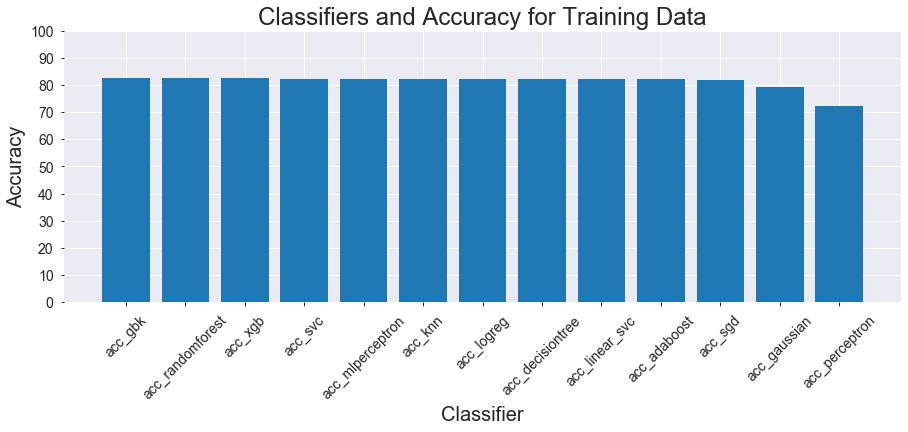

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.bar("Classifier", "Accuracy", data=acclist.sort_values(by=["Accuracy"], ascending=False))
plt.title("Classifiers and Accuracy for Training Data", size=24)
plt.xlabel("Classifier", size=20)
plt.ylabel("Accuracy", size=20)
plt.xticks(ticks=acclist["Classifier"], size=14, rotation=45)
plt.yticks(ticks=[i for i in range(0,110,10)], size=14)
plt

We can see that several classifiers score similar accuracies for our problem with the best one(s) classifying approximately 82% of the training data correctly. But do these accuracies directly translate into predictive power for out test outputs? We will check this in the following steps.

<u><p style="font-size:18px">6.4. Examining the Predictive Power via Validation with the Test Outputs</p></u>

Firstly, we will re-name the columns of our data frame which includes the predicted test outputs for each classifier, which we earlier obtained from our function:

In [65]:
predictions.columns=["LogReg", "NB", "SVM", "SVC", "Perc", "MLPerc", "DTC", 
                            "RFC", "KNN", "SGD", "ADA", "GBC", "XGB"]
predictions.head(5)

,LogReg,NB,SVM,SVC,Perc,MLPerc,DTC,RFC,KNN,SGD,ADA,GBC,XGB
0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,1,0,1,0,0,0,0,1,0,1,0,0
3,1,1,1,1,0,1,1,1,1,1,1,1,1
4,0,1,0,0,0,0,0,0,0,0,0,0,0


In order to assess the accuracy of each model, we can create confusion matrices which will show us how many cases of the test targets were predicted correctly by each model. We will do this in the following way:

We will substract the actual results from each column of the predictions data frame. For each case that we receive the result "0", the prediction has been identical with the actualt result, and thus correct. For each case that we receive the result "-1", the predictions have resulted in a false negative and for each result of "1" in a false positive. 

In order to correctly substract the test targets, we need to reset their index first.

In [216]:
targets_test_reset = targets_test.reset_index(drop=True)

prediction_results = predictions.subtract(targets_test_reset, axis = 0)

prediction_results.head(5)

,LogReg,NB,SVM,SVC,Perc,MLPerc,DTC,RFC,KNN,SGD,ADA,GBC,XGB
0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,1,0,0,0,0,1,0,1,0,0
3,1,1,1,1,0,1,1,1,1,1,1,1,1
4,0,1,0,0,0,0,0,0,0,0,0,0,0


We can now test for each classifier the ratio of false positives (FP), to false negatives (FN), to correct predictions (CP):

In [224]:
pred_tab_p = pd.DataFrame()
pred_tab_r = pd.DataFrame()

for i in prediction_results.columns.values:
    p = pd.DataFrame(prediction_results[i].value_counts())
    r = round(pd.Series(1 - (prediction_results[i].value_counts()[1] + prediction_results[i].value_counts()[-1]) / prediction_results[i].value_counts()[0]),4)
    
    pred_tab_p = pd.concat([pred_tab_p, p], axis=1)
    pred_tab_r = pd.concat([pred_tab_r, r*100], axis=1)
    
pred_tab_p = pred_tab_p.rename(index={0:"CP", -1:"FN", 1:"FP"})
pred_tab_r = pred_tab_r.rename(index={0: "Accuracy"})
pred_tab_r.columns = prediction_results.columns.values

pred_tab = pd.concat([pred_tab_p, pred_tab_r], axis=0)
pred_tab = pred_tab.reindex(["FN","FP","CP","Accuracy"])

pred_tab.sort_values(by="Accuracy", axis=1, ascending=False)

,RFC,KNN,SVM,DTC,MLPerc,XGB,GBC,LogReg,ADA,SGD,SVC,NB,Perc
FN,668.00,643.00,668.00,636.0,665.00,654.00,657.00,644.00,645.00,620.00,640.00,564.00,1124.00
FP,386.00,418.00,397.00,434.0,407.00,418.00,416.00,442.00,442.00,469.00,456.00,729.00,317.00
CP,5087.00,5080.00,5076.00,5071.0,5069.00,5069.00,5068.00,5055.00,5054.00,5052.00,5045.00,4848.00,4700.00
Accuracy,79.28,79.11,79.02,78.9,78.85,78.85,78.83,78.52,78.49,78.44,78.28,73.33,69.34


We can see that the <u>Random Forest Classifier</u> has been the best to predict the actual outcomes of our test targets with a close to 80% accuracy. The accuracy is below the one we received for the same classifier on the training data, which is to expect as the model was learning to fit the training data most accurately.

However, with its accuracy being only 82.47 - 79.28 = 3.19% lower, we can conclude that we have not overfit our model too much, so it remains useful for classifying future, unknown data.

We can also have a look again at the order of best classification for the training data.

In [209]:
pred_tab_train = pd.DataFrame([acclist["Classifier"],acclist["Accuracy"]]) 
pred_tab_train.columns = ["LogReg", "NB", "SVM", "SVC", "Perc", "MLPerc", "DTC", "RFC", "KNN", "SGD", "ADA", "GBC", "XGB"]
pred_tab_train = pred_tab_train.iloc[1:]
pred_tab_train.sort_values(by="Accuracy", axis=1, ascending=False)

,GBC,RFC,XGB,SVM,MLPerc,KNN,LogReg,DTC,SVC,ADA,SGD,NB,Perc
Accuracy,82.5,82.47,82.38,82.29,82.29,82.15,82.12,82.1,82.07,82.05,81.73,79.22,72.09


It becomes visible here that the order of best performers is slightly different. We can look at how well each classifier performed on the test data in comparison to training data performance:

In [225]:
acc_comp = pd.DataFrame()

for i in pred_tab.columns.values:
    acc_comp[i] = pred_tab.iloc[3:][i] - pred_tab_train[i]

acc_comp.sort_values(by="Accuracy", axis=1, ascending=False)

,Perc,KNN,RFC,DTC,SVM,SGD,MLPerc,XGB,ADA,LogReg,GBC,SVC,NB
Accuracy,-2.75,-3.04,-3.19,-3.2,-3.27,-3.29,-3.44,-3.53,-3.56,-3.6,-3.67,-3.79,-5.89


While both <u>Naive Bayes</u> and <u>Perceptron</u> (both relatively simple models) show the "worst" performance among all classifiers on both traing and test data, <u>Naive Bayes</u> has been performing worst with an around 6% lower accuracy compared to the training data. <u>Perceptron</u>, on the other hand, has shown the most stability in its predictions, even though it is still underperforming in comparison to the other classifiers.

Considering the overall results, the <u>Random Forest</u>, <u>KNN</u> and <u>Support Vector Machines</u> classifiers have performed particularly well, even though the differences to the opther classifiers are very small. Apart from <u>Naive Bayes</u> and the simple <u>Perceptron</u>, any other classifier would probably produce satisfactory results for predicting the outcomes of future data. However, we will choose the winner for the test data, the <u>Random Forest</u> classifier, to predict whether the yearly income of 3 fictional individuals, is likely to be higher than 50.000 dollars.

<u><p style="font-size:20px">7. Predicting the Income of 4 Fictional Persons</p></u>

As a last step of this example, we can check for 3 fictional individuals whether, according to our model, these individuals would earn more than 50.000 dollars a year or not.

We are going to test 3 individuals of which 2 are our "stereotypes" that we described in the conclusion of our results after the initial logistic regression, and 1 other will have a random combination of the characteristics in our dataset:

1. The first person will be a married, overworking white man aged 45-54, with a higher education and a white collar job within the public sector.


2. The second person will be an single, occassionally working non-white woman aged 17-24, without a higher education and a blue collar job in the private sector.


3. The third person will be a divorced, full-time working non-white man aged 55-64, without a higher education and a blue collar job in the public sector.

We first need to create our cases in a new dataset. To get the right column names, we can take the column descriptions from our last dataset:

In [228]:
column_names = inputs_train.columns.values

predict_persons = pd.DataFrame([
    [1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0]], columns=column_names) 

predict_persons

,Sex,25-34,35-44,45-54,55-64,65+,Race_c,Education_c,Occupation_c,Workclass_c,Full-time Work,Overworkers,Status_c
0,1,0,0,1,0,0,1,1,1,1,0,1,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,1,1,0,0


In order to predict out outputs with the <u>Random Forest</u> classifier, we need to call its instance again outside of the function we have defined it in before. 

In [ ]:
# MODEL-8) Random Forest
# ----------------------
    
criteria = ('gini', 'entropy')
n_estimators = [i for i in range(20, 201, 20)]
max_depths = [i for i in range(2, 20)]
grid = {'criterion': criteria, 'max_depth': max_depths, 'n_estimators': n_estimators}
randomforest = RandomForestClassifier(random_state=33)
grid = GridSearchCV(estimator=randomforest, param_grid=grid, cv=kfold, scoring='accuracy', n_jobs=-1)
grid.fit(inputs_train, targets_train)
randomforest = grid.best_estimator_

In [285]:
randomforest.predict_proba(predict_persons)

array([[0.18788227, 0.81211773],
       [0.99860887, 0.00139113],
       [0.95462674, 0.04537326]])

We can see that our stereotype white, older, overworking married man has an approximately 81% chance to earn more than 50.000 dollars a year, while the chances for an umarried, non-white, occassionally working, young woman are next to zero. Lastly, our divorced, none-white male with a full-time blue collar job and close to his retirement has only a 4-5% chance of having a high income.